### smet文件转换为csv格式

In [ ]:
import os
import pandas as pd

input_folder = '/home/develop/dataset/smet/'
output_folder = '/home/develop/dataset/csv'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

smet_files = [f for f in os.listdir(input_folder) if f.endswith('.smet')]

for smet_file in smet_files:
    smet_file_path = os.path.join(input_folder, smet_file)

    try:
        data = pd.read_csv(smet_file_path, sep='\t', header=None)
        output_csv_path = os.path.join(output_folder, smet_file.replace('.smet', '.csv'))
        data.to_csv(output_csv_path, index=False)
    except Exception as e:
        print("转换完成")

### 去除头部Header

In [2]:
import os

# 输入和输出目录
input_dir = '/home/develop/dataset/csvWithHeader'
output_dir = '/home/develop/dataset/csv'

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# 遍历输入目录中的所有.csv文件
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        input_filepath = os.path.join(input_dir, filename)
        
        # 打开当前CSV文件并读取内容
        with open(input_filepath, 'r') as file:
            lines = file.readlines()

        # 查找 [DATA] 行的位置
        start_index = None
        for i, line in enumerate(lines):
            if '[DATA]' in line:
                start_index = i + 1  # 从[DATA]之后开始提取
                break

        # 如果找到了[DATA]部分
        if start_index is not None:
            # 提取从[DATA]行之后的数据
            data_to_keep = lines[start_index:]
            
            # 定义输出文件的路径
            output_filepath = os.path.join(output_dir, filename)
            
            # 将提取的数据写入新的文件
            with open(output_filepath, 'w') as output_file:
                output_file.writelines(data_to_keep)
            
            print(f"处理并保存文件: {filename}")
        else:
            print(f"文件 {filename} 中没有找到 [DATA] 标签")


处理并保存文件: Grid_159_158_Precip_Neum.csv
处理并保存文件: Grid_17_81_Precip_Neum.csv
处理并保存文件: Grid_175_194_Precip_Neum.csv
处理并保存文件: Grid_72_100_Precip_Neum.csv
处理并保存文件: Grid_49_127_Precip_Neum.csv
处理并保存文件: Grid_196_52_Precip_Neum.csv
处理并保存文件: Grid_9_169_Precip_Neum.csv
处理并保存文件: Grid_22_124_Precip_Neum.csv
处理并保存文件: Grid_120_192_Precip_Neum.csv
处理并保存文件: Grid_101_165_Precip_Neum.csv
处理并保存文件: Grid_130_176_Precip_Neum.csv
处理并保存文件: Grid_132_47_Precip_Neum.csv
处理并保存文件: Grid_164_118_Precip_Neum.csv
处理并保存文件: Grid_120_185_Precip_Neum.csv
处理并保存文件: Grid_3_179_Precip_Neum.csv
处理并保存文件: Grid_2_0_Precip_Neum.csv
处理并保存文件: Grid_163_93_Precip_Neum.csv
处理并保存文件: Grid_167_84_Precip_Neum.csv
处理并保存文件: Grid_81_174_Precip_Neum.csv
处理并保存文件: Grid_71_195_Precip_Neum.csv
处理并保存文件: Grid_79_31_Precip_Neum.csv
处理并保存文件: Grid_50_82_Precip_Neum.csv
处理并保存文件: Grid_165_179_Precip_Neum.csv
处理并保存文件: Grid_132_92_Precip_Neum.csv
处理并保存文件: Grid_101_96_Precip_Neum.csv
处理并保存文件: Grid_57_19_Precip_Neum.csv
处理并保存文件: Grid_38_102_Precip_Neum.csv
处理

### 不同列之间用逗号隔开

In [ ]:
import os
import pandas as pd

# 指定CSV文件夹路径
folder_path = "/home/develop/dataset/csv"

# 遍历文件夹中的所有CSV文件
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        
        # 读取文件，将空格作为分隔符，尝试将所有数据解析为数值类型
        data = pd.read_csv(file_path, delim_whitespace=True, header=None)
        
        # 将所有数据转换为数值类型，无法转换的内容置为NaN
        data = data.apply(pd.to_numeric, errors='coerce')
        
        # 将DataFrame保存为新的CSV文件，使用空格作为分隔符
        data.to_csv(file_path, index=False, header=False, sep=',')
        
        print(f"文件 {filename} 已成功转换为数值类型，并使用空格分隔保存。")


### 转换为数值类型

In [ ]:
import os
import pandas as pd

# 定义文件夹路径
folder_path = '/home/develop/dataset/csv'

# 遍历文件夹中的所有 CSV 文件
for filename in os.listdir(folder_path):
    # 判断文件是否是 CSV 文件
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        try:
            # 读取 CSV 文件
            data = pd.read_csv(file_path, header=None)
            
            # 遍历每列并尝试将数据转换为数值类型
            for col in data.columns:
                # 尝试将每一列转换为数值类型，若转换失败则抛出异常
                data[col] = pd.to_numeric(data[col])
            
            # 保存修复后的数据
            data.to_csv(file_path, index=False, header=False)
            print(f"文件 '{filename}' 中的数据已成功转换为数值并保存。")
        
        except ValueError as e:
            print(f"在文件 '{filename}' 中发生转换错误：{e}")
            # 如果需要，你可以打印出导致错误的行
            # data[col].isnull() 会告诉你哪个行有错误
            for col in data.columns:
                invalid_rows = data[pd.to_numeric(data[col], errors='coerce').isnull()]
                if not invalid_rows.empty:
                    print(f"列 '{col}' 中的错误行：")
                    print(invalid_rows)


### 数据合并

In [5]:
import os
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
from functools import partial

# 定义文件夹路径和输出文件路径
folder_path = '/home/develop/dataset/csv'
output_file = '/home/develop/dataset/merged_output.csv'

# 批量处理函数：合并指定的一批文件
def process_batch(file_list):
    data_frames = []
    for file in file_list:
        # 读取文件，没有表头的情况下设置 header=None
        df = pd.read_csv(file, header=None)
        data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)

# 主函数：多线程批量合并
def batch_merge_csv(folder_path, output_file, batch_size=1000):
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
    total_files = len(all_files)

    with ProcessPoolExecutor() as executor:
        # 按批次分割文件列表
        batches = [all_files[i:i + batch_size] for i in range(0, total_files, batch_size)]
        partial_process = partial(process_batch)

        # 分批次并行处理并写入文件
        for idx, result in enumerate(executor.map(partial_process, batches)):
            # 没有表头时，直接按批次追加写入
            result.to_csv(output_file, index=False, header=False, mode='a')

            print(f"已处理批次 {idx + 1}/{len(batches)}")

# 执行合并
batch_merge_csv(folder_path, output_file)
print("所有 CSV 文件已合并到一个文件中。")


已处理批次 1/40
已处理批次 2/40
已处理批次 3/40
已处理批次 4/40
已处理批次 5/40
已处理批次 6/40
已处理批次 7/40
已处理批次 8/40
已处理批次 9/40
已处理批次 10/40
已处理批次 11/40
已处理批次 12/40
已处理批次 13/40
已处理批次 14/40
已处理批次 15/40
已处理批次 16/40
已处理批次 17/40
已处理批次 18/40
已处理批次 19/40
已处理批次 20/40
已处理批次 21/40
已处理批次 22/40
已处理批次 23/40
已处理批次 24/40
已处理批次 25/40
已处理批次 26/40
已处理批次 27/40
已处理批次 28/40
已处理批次 29/40
已处理批次 30/40
已处理批次 31/40
已处理批次 32/40
已处理批次 33/40
已处理批次 34/40
已处理批次 35/40
已处理批次 36/40
已处理批次 37/40
已处理批次 38/40
已处理批次 39/40
已处理批次 40/40
所有 CSV 文件已合并到一个文件中。


### 添加表头

In [8]:
import pandas as pd

# 定义文件路径和新表头
file_path = '/home/develop/dataset/merged_output.csv'

# 定义表头（列名）
header = [
    "sensible_heat", "latent_heat", "ground_heat", "ground_temperature", 
    "ground_heat_at_soil_interface", "rain_energy", "snow_internal_energy_change", 
    "snow_melt_freeze_energy", "snow_cold_content", "outgoing_long_wave_radiation", 
    "incoming_long_wave_radiation", "net_long_wave_radiation", "reflected_short_wave_radiation", 
    "incoming_short_wave_radiation", "net_short_wave_radiation", "parametrized_albedo", 
    "measured_albedo", "incoming_short_wave_on_horizontal", "direct_incoming_short_wave", 
    "diffuse_incoming_short_wave", "air_temperature", "surface_temperature(mod)", 
    "surface_temperature(meas)", "bottom_temperature", "relative_humidity", "wind_velocity", 
    "wind_velocity_drift", "wind_direction", "solid_precipitation_rate", "snow_height(mod)", 
    "snow_height(meas)", "hoar_size", "24h_wind_drift", "3h_height_of_new_snow", 
    "6h_height_of_new_snow", "12h_height_of_new_snow", "24h_height_of_new_snow", 
    "3d_sum_of_daily_height_of_new_snow", "24h_percipitation", "skier_penetration_depth", 
    "snow_water_equivalent", "total_amount_of_water", "total_amount_of_water_soil", 
    "total_amount_of_ice_soil", "erosion_mass_loss", "rain_rate", 
    "virtual_lysimeter_surface_snow_only", "surface_mass_flux", 
    "virtual_lysimeter_under_the_soil", "sublimation_mass", "evaporated_mass", 
    "temperature@0.25m", "temperature@0.5m", "temperature@1m", "temperature@-0.25m", 
    "temperature@-0.1m", "profile_type", "stability_class", "z_Sdef", 
    "deformation_rate_stability_index", "z_Sn38", "natural_stability_index", "z_Sk38", 
    "Sk38_skier_stability_index", "z_SSI", "structural_stability_index", "z_S5", 
    "stability_index_5"
]

# 读取 CSV 文件，以逗号为分隔符
data = pd.read_csv(file_path, header=None, sep=',')

# 检查列数是否与表头匹配
if len(data.columns) == len(header):
    print(f"列数匹配，表头将被添加到文件中。")
    # 添加表头
    data.columns = header

    # 将修改后的数据保存回 CSV 文件
    data.to_csv(file_path, index=False, sep=',')
    print(f"表头已成功添加到 {file_path}。")
else:
    print(f"列数不匹配！实际列数为 {len(data.columns)}，表头参数个数为 {len(header)}。")


列数匹配，表头将被添加到文件中。
表头已成功添加到 /home/develop/dataset/merged_output.csv。


In [9]:
import pandas as pd

# 定义文件路径
file_path = '/home/develop/dataset/merged_output.csv'

# 统计行数
num_rows = sum(1 for _ in open(file_path))

print(f"文件中共有 {num_rows} 行数据。")


文件中共有 3382862 行数据。


In [21]:
import pandas as pd
# 尝试读取 CSV 文件的前三列的前30行
try:
    # 读取前三列的前30行数据
    data_first_three_columns = pd.read_csv(file_path, delimiter=',', usecols=[2], nrows=300000)
    # data_first_three_columns
except FileNotFoundError:
    "File not found. Please check the file path."
data_first_three_columns 

,ground_temperature
0,-7.48
1,-1.16
2,-6.27
3,-12.34
4,-9.68
...,...
299995,0.00
299996,0.00
299997,0.00
299998,0.00


### 确定数据是否为数值类型

In [15]:
import pandas as pd

# 定义文件路径
file_path = '/home/develop/dataset/merged_output.csv'

# 读取 CSV 文件，以逗号为分隔符
data = pd.read_csv(file_path, header=None, sep=',')

# 初始化一个列表，用于存储数值类型的列名
numeric_columns = []

# 遍历每一列
for col in data.columns:
    # 尝试将该列数据转换为数值类型
    try:
        pd.to_numeric(data[col])
        # 如果成功，则添加到数值类型的列名列表中
        numeric_columns.append(col)
    except ValueError:
        # 如果转换失败，则跳过
        continue

# 输出数值类型的列名
if numeric_columns:
    print("以下列包含数值类型的数据：")
    for col in numeric_columns:
        print(f"列 {col}")
else:
    print("没有找到数值类型的列。")


/tmp/ipykernel_1692582/2151752978.py:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, header=None, sep=',')


没有找到数值类型的列。


### 1.全部改成数值类型

In [17]:
import pandas as pd

# 定义文件路径
file_path = '/home/develop/dataset/merged_output.csv'

# 读取 CSV 文件，指定第一行为列名，并关闭低内存模式
data = pd.read_csv(file_path, header=0, sep=',', low_memory=False)

# 将每列转换为浮点数类型
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 打印数据类型检查
print("数据类型已全部转换为浮点数:")
print(data.dtypes)


数据类型已全部转换为浮点数:
sensible_heat                    float64
latent_heat                      float64
ground_heat                      float64
ground_temperature               float64
ground_heat_at_soil_interface    float64
                                  ...   
Sk38_skier_stability_index       float64
z_SSI                            float64
structural_stability_index       float64
z_S5                             float64
stability_index_5                float64
Length: 68, dtype: object


#### 2.遍历数据集 查看是否有全为缺失值的列(数值不变或者全为-999)

In [19]:
import pandas as pd

# 定义文件路径
file_path = '/home/develop/dataset/merged_output.csv'

# 读取 CSV 文件
data = pd.read_csv(file_path, header=0, sep=',', low_memory=False)

# 遍历每一列
for col in data.columns:
    # 检查列中是否所有值都相同
    unique_values = data[col].unique()
    if len(unique_values) == 1:
        # 输出列名和该列唯一的数值
        print(f"列 '{col}' 的所有值相同，值为: {unique_values[0]}")


列 'ground_heat' 的所有值相同，值为: 0.0
列 'surface_temperature(meas)' 的所有值相同，值为: -999
列 'total_amount_of_water_soil' 的所有值相同，值为: 0.0
列 'total_amount_of_ice_soil' 的所有值相同，值为: 0.0
列 'virtual_lysimeter_under_the_soil' 的所有值相同，值为: -999
列 'temperature@0.25m' 的所有值相同，值为: -999
列 'temperature@0.5m' 的所有值相同，值为: -999
列 'temperature@1m' 的所有值相同，值为: -999
列 'temperature@-0.25m' 的所有值相同，值为: -999
列 'temperature@-0.1m' 的所有值相同，值为: -999
列 'profile_type' 的所有值相同，值为: -1.0
列 'z_S5' 的所有值相同，值为: 0.0


### 删除对应的列

In [20]:
import pandas as pd

# 定义文件路径
file_path = '/home/develop/dataset/merged_output.csv'

# 读取 CSV 文件
data = pd.read_csv(file_path, header=0, sep=',', low_memory=False)

# 定义要删除的列名列表
columns_to_drop = [
    "ground_heat", "surface_temperature(meas)", "total_amount_of_water_soil", 
    "total_amount_of_ice_soil", "virtual_lysimeter_under_the_soil", 
    "temperature@0.25m", "temperature@0.5m", "temperature@1m", 
    "temperature@-0.25m", "temperature@-0.1m", "profile_type", "z_S5"
]

# 删除指定列
data.drop(columns=columns_to_drop, inplace=True)

# 保存修改后的数据回到 CSV 文件
data.to_csv(file_path, index=False)

print("已删除指定的列:", columns_to_drop)


已删除指定的列: ['ground_heat', 'surface_temperature(meas)', 'total_amount_of_water_soil', 'total_amount_of_ice_soil', 'virtual_lysimeter_under_the_soil', 'temperature@0.25m', 'temperature@0.5m', 'temperature@1m', 'temperature@-0.25m', 'temperature@-0.1m', 'profile_type', 'z_S5']


### 哪些列中包含缺失值（-999）

In [24]:
import pandas as pd
import numpy as np

# 定义文件路径
file_path = '/home/develop/dataset/merged_output.csv'

# 读取 CSV 文件，将 -999 作为缺失值
data = pd.read_csv(file_path, header=0, sep=',', na_values=-999, low_memory=False)

# 统计包含缺失值的列数
columns_with_missing_values = data.columns[data.isnull().any()]

# 输出结果
print(f"包含缺失值的列数: {len(columns_with_missing_values)}")
print("包含缺失值的列名:")
for col in columns_with_missing_values:
    print(col)


包含缺失值的列数: 8
包含缺失值的列名:
ground_heat_at_soil_interface
measured_albedo
skier_penetration_depth
deformation_rate_stability_index
natural_stability_index
Sk38_skier_stability_index
structural_stability_index
stability_index_5


### 多少条数据中包含缺失值

In [2]:
import pandas as pd
file_path = '/home/develop/dataset/merged_output.csv'
data = pd.read_csv(file_path, header=0, sep=',', na_values=-999, low_memory=False)
rows_with_missing_values = data.isnull().any(axis=1).sum()
print(f"包含缺失值的行数: {rows_with_missing_values}")

包含缺失值的行数: 0


In [1]:
import pandas as pd

# 读取CSV文件
file_path = '/home/develop/dataset/merged_output.csv' # 替换为你的文件路径
data = pd.read_csv(file_path)

# 获取行和列的数量
rows, columns = data.shape

print(f'行数: {rows}, 列数: {columns}')


行数: 3382861, 列数: 44


### VAE模型训练

Epoch 1/50
21143/21143 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - loss: 3.4413 - val_loss: 3.2110
Epoch 2/50
21143/21143 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 3.2079 - val_loss: 3.2112
Epoch 3/50
21143/21143 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 3.2071 - val_loss: 3.2107
Epoch 4/50
21143/21143 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 3.2066 - val_loss: 3.2111
Epoch 5/50
21143/21143 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 3.2052 - val_loss: 3.2107
Epoch 6/50
21143/21143 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 3.2058 - val_loss: 3.2106
Epoch 7/50
21143/21143 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 3.2052 - val_loss: 3.2109
Epoch 8/50
21143/21143 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 3.2059 - val_loss: 3.2106
Epoch 9/50
21143/21143 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 3.2069 - val_loss: 3.2107
Epoch 10/50
21143/21143 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 3.2062 - val_loss: 3.2108
Epoch 11/50
21143/21143 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 3.2054 - val_loss: 3.21

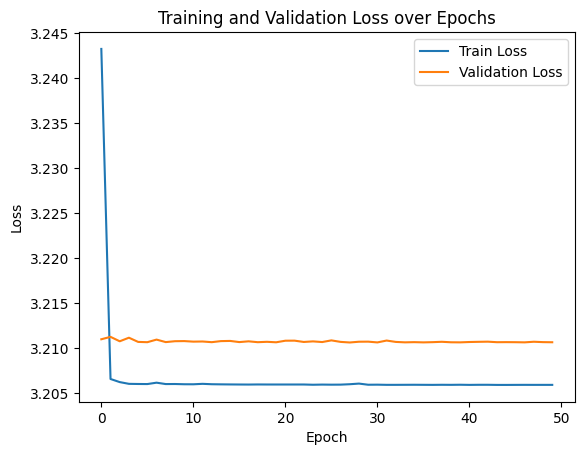

21143/21143 ━━━━━━━━━━━━━━━━━━━━ 14s 678us/step


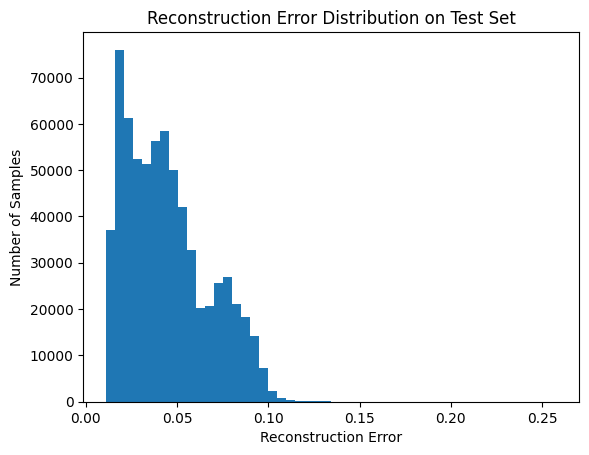

Number of anomalies detected: 33829
Indices of anomalies: [    95    103    111 ... 676293 676386 676402]


In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

data = pd.read_csv('/home/develop/dataset/merged_output.csv')
X = data.values 

# 数据集划分
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]

input_dim = X.shape[1]  # 输入特征维度，应该是44
# 潜在空间的维度 可以调整
latent_dim = 10  

# 编码器
input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(32, activation="relu")(input_layer)
encoder = layers.Dense(16, activation="relu")(encoder)
z_mean = layers.Dense(latent_dim)(encoder)
z_log_var = layers.Dense(latent_dim)(encoder)

# 采样层
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.random.normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# 解码器
decoder = layers.Dense(16, activation="relu")(z)
decoder = layers.Dense(32, activation="relu")(decoder)
decoder_output = layers.Dense(input_dim, activation="sigmoid")(decoder)

# 构建VAE模型
vae = Model(input_layer, [decoder_output, z_mean, z_log_var])  

# 定义自定义损失函数
def vae_loss(y_true, y_pred):
    decoder_output = y_pred[0]  # 解码器输出
    z_mean = y_pred[1]  # 获取 z_mean
    z_log_var = y_pred[2]  # 获取 z_log_var
    
    # 计算重构损失
    reconstruction_loss_fn = tf.keras.losses.MeanSquaredError()
    reconstruction_loss = reconstruction_loss_fn(y_true, decoder_output) * input_dim
    
    # 计算KL散度损失
    kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
    
    # 返回总损失
    return tf.reduce_mean(reconstruction_loss + kl_loss)

# 编译和训练模型
vae.compile(optimizer="adam", loss=vae_loss)
history = vae.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 可视化训练损失
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss over Epochs")
plt.show()

# 异常检测
X_pred = vae.predict(X_test)[0]  # 获取解码器输出
reconstruction_error = np.mean(np.square(X_test - X_pred), axis=1)

# 可视化重构误差分布
plt.hist(reconstruction_error, bins=50)
plt.xlabel("Reconstruction Error")
plt.ylabel("Number of Samples")
plt.title("Reconstruction Error Distribution on Test Set")
plt.show()


threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

print("Number of anomalies detected:", np.sum(anomalies))
print("Indices of anomalies:", np.where(anomalies)[0])


In [3]:
import pandas as pd
df = pd.read_csv(file_path, delimiter=',', usecols=[0,1,2,3,4,5], nrows=50)
df 

,sensible_heat,latent_heat,ground_temperature,rain_energy,snow_internal_energy_change,snow_melt_freeze_energy
0,0.245405,0.545888,0.540063,0.438199,0.241623,0.25413
1,0.245324,0.545836,0.608587,0.438199,0.241623,0.25413
2,0.245332,0.545840,0.553182,0.438199,0.241623,0.25413
3,0.245521,0.545906,0.487369,0.438199,0.241623,0.25413
4,0.245478,0.545905,0.516209,0.438199,0.241623,0.25413
5,0.245455,0.545898,0.514908,0.438199,0.241623,0.25413
6,0.245463,0.545906,0.505367,0.438199,0.241623,0.25413
7,0.245430,0.545951,0.823159,0.438199,0.241623,0.25413
8,0.245345,0.546037,0.908706,0.438199,0.241623,0.25413
9,0.245324,0.546072,0.887672,0.438199,0.241623,0.25413


In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

data = pd.read_csv('/home/develop/dataset/merged_output.csv')
X = data.values

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]

input_dim = X.shape[1]  # 输入特征维度

# 超参数网格
latent_dims = [5, 10, 20]
batch_sizes = [32, 64, 128, 256]
epochs_list = [30, 50, 100]

# 保存路径
save_dir = "/home/develop/dataset/pic/"
os.makedirs(save_dir, exist_ok=True)

# 定义VAE模型和损失函数
def build_vae(input_dim, latent_dim):
    # 编码器
    input_layer = layers.Input(shape=(input_dim,))
    encoder = layers.Dense(32, activation="relu")(input_layer)
    encoder = layers.Dense(16, activation="relu")(encoder)
    z_mean = layers.Dense(latent_dim)(encoder)
    z_log_var = layers.Dense(latent_dim)(encoder)

    # 采样层
    def sampling(args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # 解码器
    decoder = layers.Dense(16, activation="relu")(z)
    decoder = layers.Dense(32, activation="relu")(decoder)
    decoder_output = layers.Dense(input_dim, activation="sigmoid")(decoder)

    # 构建VAE模型
    vae = Model(input_layer, [decoder_output, z_mean, z_log_var])

    # 定义自定义损失函数
    def vae_loss(y_true, y_pred):
        decoder_output = y_pred[0]
        z_mean = y_pred[1]
        z_log_var = y_pred[2]
        reconstruction_loss_fn = tf.keras.losses.MeanSquaredError()
        reconstruction_loss = reconstruction_loss_fn(y_true, decoder_output) * input_dim
        kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
        return tf.reduce_mean(reconstruction_loss + kl_loss)

    return vae, vae_loss

# 训练和保存结果
for latent_dim in latent_dims:
    for batch_size in batch_sizes:
        for epochs in epochs_list:
            # 构建模型
            vae, vae_loss = build_vae(input_dim, latent_dim)
            vae.compile(optimizer="adam", loss=vae_loss)

            # 训练模型
            history = vae.fit(
                X_train, X_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(X_test, X_test),
                verbose=0
            )

            # 绘制训练损失
            plt.figure()
            plt.plot(history.history["loss"], label="Train Loss")
            plt.plot(history.history["val_loss"], label="Validation Loss")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.legend()
            plt.title(f"Loss (latent_dim={latent_dim}, batch_size={batch_size}, epochs={epochs})")
            plt.savefig(f"{save_dir}loss_latent{latent_dim}_batch{batch_size}_epochs{epochs}.png")
            plt.close()

            # 异常检测
            X_pred = vae.predict(X_test, verbose=0)[0]
            reconstruction_error = np.mean(np.square(X_test - X_pred), axis=1)
            threshold = np.percentile(reconstruction_error, 95)
            anomalies = reconstruction_error > threshold

            # 绘制重构误差分布
            plt.figure()
            plt.hist(reconstruction_error, bins=50)
            plt.xlabel("Reconstruction Error")
            plt.ylabel("Number of Samples")
            plt.title(f"Error Dist. (latent_dim={latent_dim}, batch_size={batch_size}, epochs={epochs})")
            plt.savefig(f"{save_dir}error_dist_latent{latent_dim}_batch{batch_size}_epochs{epochs}.png")
            plt.close()

            # 打印结果
            print(f"Params: latent_dim={latent_dim}, batch_size={batch_size}, epochs={epochs}")
            print(f"Anomalies detected: {np.sum(anomalies)}\n")  

KeyboardInterrupt: 

## 代码改进优化
1. 增加编码器和解码器的层数：分别为两层，神经元数为 64 和 32。
2. 增加潜在空间维度范围：扩展到 [10, 20, 30]。
3. 修正损失函数：
    - 移除重构损失乘以 input_dim。
    - 添加 KL 损失权重 kl_loss_weight = 0.1。
4. 降低学习率：使用 learning_rate=0.0005。

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
from datetime import datetime

# 数据读取
data = pd.read_csv('/home/develop/dataset/merged_output.csv')
X = data.values

# 数据集划分
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]

input_dim = X.shape[1] 

# 超参数网格
latent_dims = [10, 20, 30]  # 潜在空间维度更新
batch_sizes = [32, 64, 128, 256]
epochs_list = [30, 50, 100]
kl_loss_weight = 0.1  # KL 损失权重

save_dir = "/home/develop/dataset/pic/"
os.makedirs(save_dir, exist_ok=True)
log_file = "/home/develop/dataset/train.log" 

def build_vae(input_dim, latent_dim):
    # 编码器
    input_layer = layers.Input(shape=(input_dim,))
    encoder = layers.Dense(64, activation="relu")(input_layer)
    encoder = layers.Dense(32, activation="relu")(encoder)
    z_mean = layers.Dense(latent_dim)(encoder)
    z_log_var = layers.Dense(latent_dim)(encoder)

    # 采样层
    def sampling(args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # 解码器
    decoder = layers.Dense(32, activation="relu")(z)
    decoder = layers.Dense(64, activation="relu")(decoder)
    decoder_output = layers.Dense(input_dim, activation="sigmoid")(decoder)

    vae = Model(input_layer, [decoder_output, z_mean, z_log_var])

    def vae_loss(y_true, y_pred):
        decoder_output = y_pred[0]
        z_mean = y_pred[1]
        z_log_var = y_pred[2]
        reconstruction_loss_fn = tf.keras.losses.MeanSquaredError()
        reconstruction_loss = reconstruction_loss_fn(y_true, decoder_output)
        kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
        return reconstruction_loss + kl_loss_weight * tf.reduce_mean(kl_loss)

    return vae, vae_loss

# 开始训练和记录日志
with open(log_file, "w") as log:
    log.write("Training Log\n")
    log.write("Parameters: latent_dim, batch_size, epochs\n")
    log.write("Results: reconstruction_error_threshold, anomalies_detected, training_time\n")
    log.write("-" * 80 + "\n")

    for latent_dim in latent_dims:
        for batch_size in batch_sizes:
            for epochs in epochs_list:
                # 构建模型
                vae, vae_loss = build_vae(input_dim, latent_dim)
                vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss=vae_loss)

                # 训练模型
                start_time = datetime.now()
                history = vae.fit(
                    X_train, X_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, X_test),
                    verbose=0
                )
                training_time = datetime.now() - start_time

                # 绘制训练损失
                plt.figure()
                plt.plot(history.history["loss"], label="Train Loss")
                plt.plot(history.history["val_loss"], label="Validation Loss")
                plt.xlabel("Epoch")
                plt.ylabel("Loss")
                plt.legend()
                plt.title(f"Loss (latent_dim={latent_dim}, batch_size={batch_size}, epochs={epochs})")
                plt.savefig(f"{save_dir}loss_latent{latent_dim}_batch{batch_size}_epochs{epochs}.png")
                plt.close()

                # 异常检测
                X_pred = vae.predict(X_test, verbose=0)[0]
                reconstruction_error = np.mean(np.square(X_test - X_pred), axis=1)
                threshold = np.percentile(reconstruction_error, 95)
                anomalies = reconstruction_error > threshold

                # 绘制重构误差分布
                plt.figure()
                plt.hist(reconstruction_error, bins=50)
                plt.xlabel("Reconstruction Error")
                plt.ylabel("Number of Samples")
                plt.title(f"Error Dist. (latent_dim={latent_dim}, batch_size={batch_size}, epochs={epochs})")
                plt.savefig(f"{save_dir}error_dist_latent{latent_dim}_batch{batch_size}_epochs{epochs}.png")
                plt.close()
                log.write(f"latent_dim={latent_dim}, batch_size={batch_size}, epochs={epochs}\n")
                log.write(f"reconstruction_error_threshold={threshold:.4f}, anomalies_detected={np.sum(anomalies)}, training_time={training_time}\n")
                log.write("-" * 80 + "\n")
                print(f"Params: latent_dim={latent_dim}, batch_size={batch_size}, epochs={epochs}")
                print(f"Reconstruction Error Threshold: {threshold:.4f}")
                print(f"Anomalies detected: {np.sum(anomalies)}")
                print(f"Training Time: {training_time}\n")
